# Handle Missing data with Simple Imputer

<b>SimpleImputer</b> is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.
It is implemented by the use of the <b>SimpleImputer()</b> method.
It takes the following arguments: 
<br><br>
<b>1. missing_values </b>: The missing_values placeholder which has to be imputed. By default is NaN<br>
<b>2. stategy</b> : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’. <br>
<b>3. fill_value </b> : The constant value to be given to the NaN data using the constant strategy.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv("cars.csv")

In [3]:
data.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307,130,3504,12,70,US
2,Buick Skylark 320,15,8,350,NaN,3693,11.5,70,US
3,Plymouth Satellite,NaN,8,318,150,3436,11,70,US
4,AMC Rebel SST,16,8,NaN,150,NaN,12,70,US


In [4]:
data.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There are not much missing values.

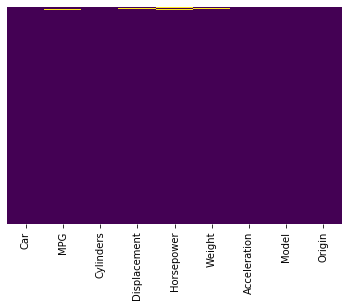

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#Exclude Origin column because it is a cateogrical column
numeric_features=data.iloc[:,:-1].values
numeric_features

array([['STRING', 'DOUBLE', 'INT', ..., 'DOUBLE', 'DOUBLE', 'INT'],
       ['Chevrolet Chevelle Malibu', nan, '8', ..., '3504', '12', '70'],
       ['Buick Skylark 320', '15', '8', ..., '3693', '11.5', '70'],
       ...,
       ['Dodge Rampage', '32', '4', ..., '2295', '11.6', '82'],
       ['Ford Ranger', '28', '4', ..., '2625', '18.6', '82'],
       ['Chevy S-10', '31', '4', ..., '2720', '19.4', '82']], dtype=object)

In [7]:
#Initialize SimpleImputer method
s_imputer=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)

In [8]:
#fit imputer object on only numeric data
s_imputer.fit(numeric_features[1:,1:8])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [9]:
#fit_transform imputer object on only numeric data
numeric_features[1:,1:8]=s_imputer.fit_transform(numeric_features[1:,1:8])

In [10]:
#After applying SimpleImputer method
numeric_features

array([['STRING', 'DOUBLE', 'INT', ..., 'DOUBLE', 'DOUBLE', 'INT'],
       ['Chevrolet Chevelle Malibu', 23.096277915632754, 8.0, ...,
        3504.0, 12.0, 70.0],
       ['Buick Skylark 320', 15.0, 8.0, ..., 3693.0, 11.5, 70.0],
       ...,
       ['Dodge Rampage', 32.0, 4.0, ..., 2295.0, 11.6, 82.0],
       ['Ford Ranger', 28.0, 4.0, ..., 2625.0, 18.6, 82.0],
       ['Chevy S-10', 31.0, 4.0, ..., 2720.0, 19.4, 82.0]], dtype=object)

In [11]:
#New data after Handling missing values with SimpleImputer method
new_data=pd.DataFrame(numeric_features)
new_data

,0,1,2,3,4,5,6,7
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT
1,Chevrolet Chevelle Malibu,23.0963,8,307,130,3504,12,70
2,Buick Skylark 320,15,8,350,103.144,3693,11.5,70
3,Plymouth Satellite,23.0963,8,318,150,3436,11,70
4,AMC Rebel SST,16,8,194.51,150,2978.29,12,70
...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27,4,140,86,2790,15.6,82
403,Volkswagen Pickup,44,4,97,52,2130,24.6,82
404,Dodge Rampage,32,4,135,84,2295,11.6,82
405,Ford Ranger,28,4,120,79,2625,18.6,82


<b>Conclusion: </b> Simple Imputer method is fast way to handle null values in the large dataset with either mean, median, most_frequent and constant.